In [163]:
import pandas as pd
import numpy as np

In [164]:
df=pd.read_csv('Passanger_booking_data.csv')

In [165]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [166]:
#Removing duplicate rows
df = df.drop_duplicates()

In [167]:
df.shape

(49283, 14)

In [168]:
df.isna().sum()
#No null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [169]:
df.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49283.000000,49283,49283,49283.000000,49283.000000,49283.000000,49283,49283,49283,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,43918,48780,NaN,NaN,NaN,7988,2620,17692,NaN,NaN,NaN,NaN,NaN
mean,1.590204,NaN,NaN,84.723393,23.054197,9.070613,NaN,NaN,NaN,0.668222,0.295639,0.426638,7.279937,0.149991
std,1.016540,NaN,NaN,90.409389,33.831644,5.413007,NaN,NaN,NaN,0.470856,0.456334,0.494594,1.496381,0.357066
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [170]:
#There are outliers in length_of_stay column (compare the 75% and max, there's a huge difference.)
#We can remove outliers in length_of_stay column since it is unlikely that length of stay is 778 hours for anyone.

In [171]:
#Removing outliers
def remove_outliers(df, column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df
df = remove_outliers(df, 'length_of_stay')

In [172]:
df.shape

(45535, 14)

In [173]:
df.reset_index(inplace=True)
df

,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
45531,49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
45532,49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
45533,50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


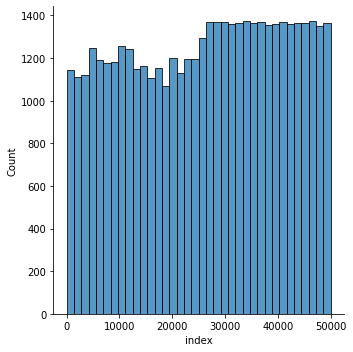

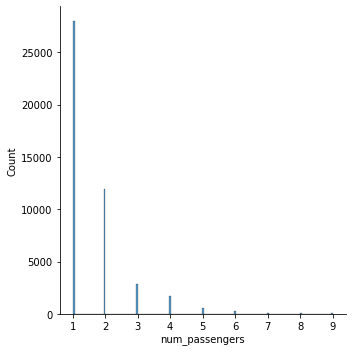

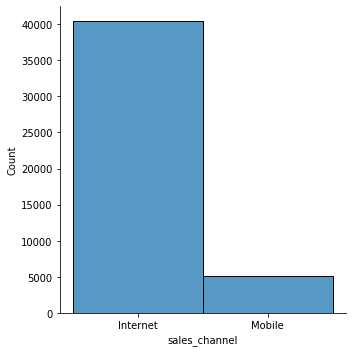

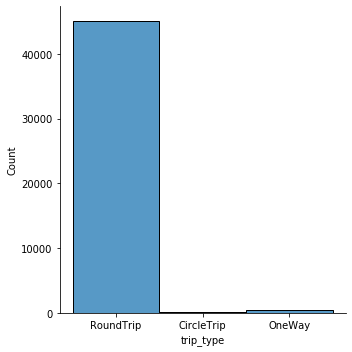

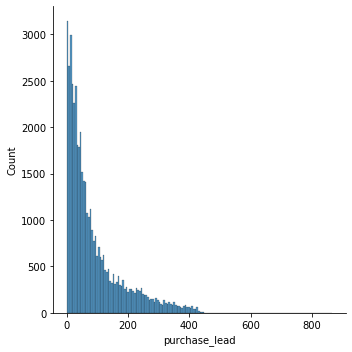

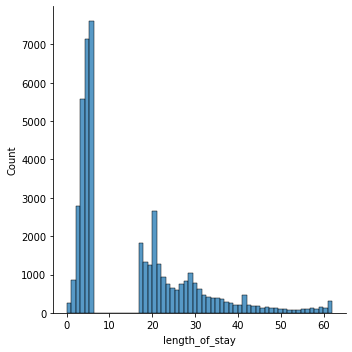

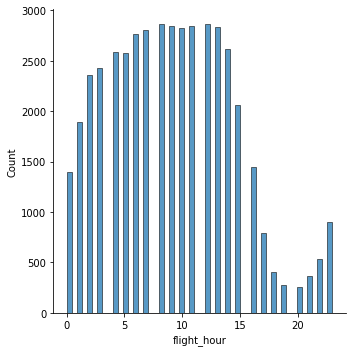

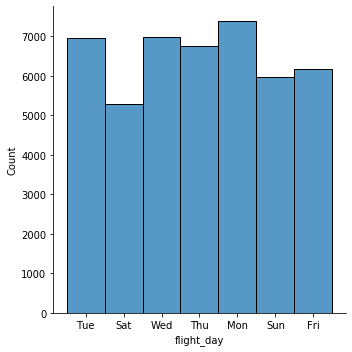

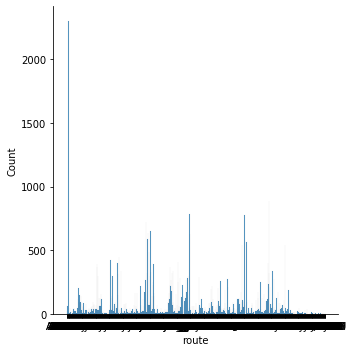

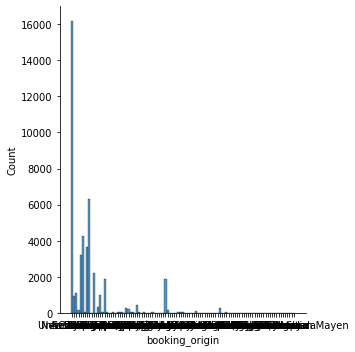

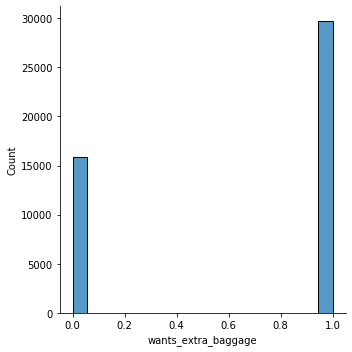

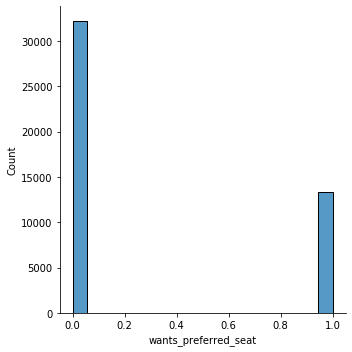

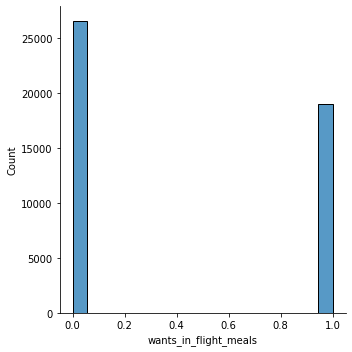

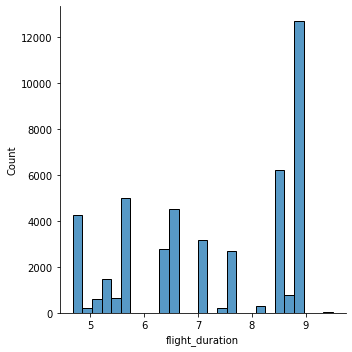

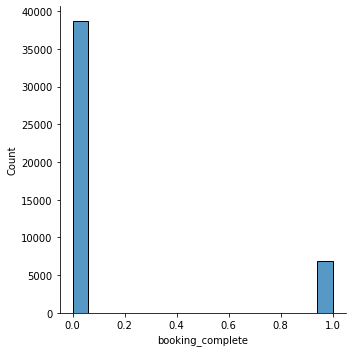

In [174]:
import seaborn as sns
for x in df.columns:
    sns.displot(df[x])

In [175]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Numerical_features: ", numeric_features)
print("Categorical_featues:", cat_features)

Numerical_features:  ['index', 'num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']
Categorical_featues: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


In [176]:
df

,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
45531,49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
45532,49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
45533,50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [177]:
#Scaling all numerical values
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 
         'wants_in_flight_meals', 'flight_duration']] = scaler.fit_transform(df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 
                              'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']])

In [178]:
df

,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0.000,Internet,RoundTrip,0.024221,0.193548,0.260870,Tue,AKLHGH,Australia,0.0,0.0,0.0,0.525880,1
1,1,0.125,Internet,RoundTrip,0.302191,0.306452,0.304348,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,0.175983,0
2,2,0.000,Internet,RoundTrip,0.129181,0.322581,0.130435,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,0.175983,0
3,3,0.125,Internet,RoundTrip,0.280277,0.354839,0.739130,Wed,AKLDEL,India,1.0,1.0,0.0,0.175983,0
4,4,0.000,Internet,RoundTrip,0.110727,0.500000,0.173913,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,0.175983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,49997,0.125,Internet,RoundTrip,0.031142,0.096774,0.391304,Sat,PERPNH,Australia,1.0,0.0,1.0,0.196687,0
45531,49998,0.000,Internet,RoundTrip,0.128028,0.096774,0.173913,Sun,PERPNH,Australia,0.0,0.0,0.0,0.196687,0
45532,49999,0.000,Internet,RoundTrip,0.027682,0.096774,0.956522,Sat,PERPNH,Australia,0.0,0.0,1.0,0.196687,0
45533,50000,0.000,Internet,RoundTrip,0.017301,0.096774,0.478261,Mon,PERPNH,Australia,1.0,0.0,1.0,0.196687,0


In [179]:
for i in cat_features:
    print(i,end="     ")
    print(df[i].nunique())

sales_channel     2
trip_type     3
flight_day     7
route     796
booking_origin     103


In [180]:
df.route.value_counts().sort_values(ascending=False).head(25)

AKLKUL    2300
PENTPE     885
ICNSIN     782
MELSGN     773
DMKKIX     718
DPSICN     653
DMKPER     638
ICNSYD     624
DMKOOL     586
MELTPE     566
SGNSYD     544
MELPEN     538
DMKSYD     485
COKSYD     447
CMBMEL     424
HNDPEN     406
PENPER     399
COKMEL     398
CGKICN     395
DPSPVG     389
HKTICN     371
CGKHND     366
PERSGN     339
CTSDMK     339
HKTSYD     334
Name: route, dtype: int64

In [181]:
df.booking_origin.value_counts().sort_values(ascending=False).head(25)

Australia         16178
Malaysia           6309
South Korea        4270
Japan              3663
China              3204
Indonesia          2197
Thailand           1905
Taiwan             1904
India              1089
Singapore          1003
New Zealand         926
United States       427
Vietnam             315
Macau               294
Hong Kong           262
Philippines         200
United Kingdom      159
Brunei              147
Cambodia            118
(not set)            73
Sri Lanka            64
Canada               56
France               53
Germany              50
Italy                50
Name: booking_origin, dtype: int64

In [182]:
top_10_route=[x for x in df.route.value_counts().sort_values(ascending=False).head(25).index]
top_10_route

['AKLKUL',
 'PENTPE',
 'ICNSIN',
 'MELSGN',
 'DMKKIX',
 'DPSICN',
 'DMKPER',
 'ICNSYD',
 'DMKOOL',
 'MELTPE',
 'SGNSYD',
 'MELPEN',
 'DMKSYD',
 'COKSYD',
 'CMBMEL',
 'HNDPEN',
 'PENPER',
 'COKMEL',
 'CGKICN',
 'DPSPVG',
 'HKTICN',
 'CGKHND',
 'PERSGN',
 'CTSDMK',
 'HKTSYD']

In [183]:
top_10_booking_origin=[x for x in df.booking_origin.value_counts().sort_values(ascending=False).head(25).index]
top_10_booking_origin

['Australia',
 'Malaysia',
 'South Korea',
 'Japan',
 'China',
 'Indonesia',
 'Thailand',
 'Taiwan',
 'India',
 'Singapore',
 'New Zealand',
 'United States',
 'Vietnam',
 'Macau',
 'Hong Kong',
 'Philippines',
 'United Kingdom',
 'Brunei',
 'Cambodia',
 '(not set)',
 'Sri Lanka',
 'Canada',
 'France',
 'Germany',
 'Italy']

In [184]:
for label in top_10_route:
    df["route_"+label]=np.where(df['route']==label,1,0)

In [185]:
for label in top_10_booking_origin:
    df["booking_origin_"+label]=np.where(df['booking_origin']==label,1,0)

In [186]:
df

,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,...,booking_origin_Philippines,booking_origin_United Kingdom,booking_origin_Brunei,booking_origin_Cambodia,booking_origin_(not set),booking_origin_Sri Lanka,booking_origin_Canada,booking_origin_France,booking_origin_Germany,booking_origin_Italy
0,0,0.000,Internet,RoundTrip,0.024221,0.193548,0.260870,Tue,AKLHGH,Australia,...,0,0,0,0,0,0,0,0,0,0
1,1,0.125,Internet,RoundTrip,0.302191,0.306452,0.304348,Sat,AKLDEL,New Zealand,...,0,0,0,0,0,0,0,0,0,0
2,2,0.000,Internet,RoundTrip,0.129181,0.322581,0.130435,Sat,AKLDEL,New Zealand,...,0,0,0,0,0,0,0,0,0,0
3,3,0.125,Internet,RoundTrip,0.280277,0.354839,0.739130,Wed,AKLDEL,India,...,0,0,0,0,0,0,0,0,0,0
4,4,0.000,Internet,RoundTrip,0.110727,0.500000,0.173913,Sat,AKLDEL,New Zealand,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,49997,0.125,Internet,RoundTrip,0.031142,0.096774,0.391304,Sat,PERPNH,Australia,...,0,0,0,0,0,0,0,0,0,0
45531,49998,0.000,Internet,RoundTrip,0.128028,0.096774,0.173913,Sun,PERPNH,Australia,...,0,0,0,0,0,0,0,0,0,0
45532,49999,0.000,Internet,RoundTrip,0.027682,0.096774,0.956522,Sat,PERPNH,Australia,...,0,0,0,0,0,0,0,0,0,0
45533,50000,0.000,Internet,RoundTrip,0.017301,0.096774,0.478261,Mon,PERPNH,Australia,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df=pd.get_dummies(df,columns=['sales_channel', 'trip_type', 'flight_day'],drop_first=True)
df

,index,num_passengers,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_origin_Italy,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,0,0.000,0.024221,0.193548,0.260870,AKLHGH,Australia,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.125,0.302191,0.306452,0.304348,AKLDEL,New Zealand,1.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
2,2,0.000,0.129181,0.322581,0.130435,AKLDEL,New Zealand,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
3,3,0.125,0.280277,0.354839,0.739130,AKLDEL,India,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,4,0.000,0.110727,0.500000,0.173913,AKLDEL,New Zealand,0.0,0.0,1.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,49997,0.125,0.031142,0.096774,0.391304,PERPNH,Australia,1.0,0.0,1.0,...,0,0,0,1,0,1,0,0,0,0
45531,49998,0.000,0.128028,0.096774,0.173913,PERPNH,Australia,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
45532,49999,0.000,0.027682,0.096774,0.956522,PERPNH,Australia,0.0,0.0,1.0,...,0,0,0,1,0,1,0,0,0,0
45533,50000,0.000,0.017301,0.096774,0.478261,PERPNH,Australia,1.0,0.0,1.0,...,0,0,0,1,1,0,0,0,0,0


In [188]:
df=df.drop("route", axis='columns')
df=df.drop("booking_origin", axis='columns')
df

,index,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Italy,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,0,0.000,0.024221,0.193548,0.260870,0.0,0.0,0.0,0.525880,1,...,0,0,0,1,0,0,0,0,1,0
1,1,0.125,0.302191,0.306452,0.304348,1.0,0.0,0.0,0.175983,0,...,0,0,0,1,0,1,0,0,0,0
2,2,0.000,0.129181,0.322581,0.130435,0.0,0.0,0.0,0.175983,0,...,0,0,0,1,0,1,0,0,0,0
3,3,0.125,0.280277,0.354839,0.739130,1.0,1.0,0.0,0.175983,0,...,0,0,0,1,0,0,0,0,0,1
4,4,0.000,0.110727,0.500000,0.173913,0.0,0.0,1.0,0.175983,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,49997,0.125,0.031142,0.096774,0.391304,1.0,0.0,1.0,0.196687,0,...,0,0,0,1,0,1,0,0,0,0
45531,49998,0.000,0.128028,0.096774,0.173913,0.0,0.0,0.0,0.196687,0,...,0,0,0,1,0,0,1,0,0,0
45532,49999,0.000,0.027682,0.096774,0.956522,0.0,0.0,1.0,0.196687,0,...,0,0,0,1,0,1,0,0,0,0
45533,50000,0.000,0.017301,0.096774,0.478261,1.0,0.0,1.0,0.196687,0,...,0,0,0,1,1,0,0,0,0,0


In [189]:
X = df.loc[:,df.columns != "booking_complete"]
y = df['booking_complete']

In [190]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
#To convert whatever strings dataset might contain to numeric values. 
#If they're incompatible with conversion, they'll be reduced to NaNs.
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
#Furthermore, we can fill those values with some default.

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [192]:
X_train.shape

(31874, 68)

In [193]:
X_test.shape

(13661, 68)

In [194]:
params={
    "base_score":[0.1,0.2,0.3,0.4], 
    "colsample_bylevel":[0.1,0.2,0.3,0.4,0.5], 
    "colsample_bynode":[0.2,0.3,0.4,0.5], 
    "colsample_bytree":[0.2,0.3,0.4,0.5],
    "gamma":[0.1,0.2,0.3,0.4,0.5,0.6], 
    "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6], 
    "max_bin":[250,280,300,320,340,360,380],
    "max_cat_to_onehot":[2,3,4,5,],
    "max_depth":[2,3,4,5],
    "min_child_weight":[2,3,4,5],
    "n_estimators":[250,300,350,400,450] 
}
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)
random_search.fit(X_train,y_train)
print(random_search.best_estimator_)

y_pred=random_search.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   43.8s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


XGBClassifier(base_score=0.3, booster='gbtree', callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=0.5, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=340, max_cat_to_onehot=5,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=350,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)
[[11531   119]
 [ 1894   117]]
0.8526462191640436
0.10413885180240322


In [195]:
import xgboost
classifier=xgboost.XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[11344   306]
 [ 1778   233]]
0.8474489422443452
0.18274509803921568


In [196]:
#F1 score is low because it is an imbalanced dataset. 
#Number of 0s in booking_complete is much more than 1s. 
#We will reduce the number of rows that are classified 0 to be equal around the number of rows that are classified as 1.

In [197]:
df.booking_complete.value_counts()

0    38688
1     6847
Name: booking_complete, dtype: int64

In [198]:
#Under sampling

# Shuffle the Dataset.
df = df.sample(frac=1,random_state=4)

# Put all the 1.0 class (Minority class) in a separate dataset.
df_1 = df.loc[df['booking_complete'] == 1.0]

#Randomly select 6847 observations from the 0 class (majority class)
df_0 = df.loc[df['booking_complete'] == 0].sample(n=6847,random_state=2)

# Concatenate both dataframes again
df = pd.concat([df_0,df_1])

In [199]:
df

,index,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Italy,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
39192,43539,0.250,0.059977,0.096774,0.086957,1.0,0.0,1.0,0.033126,0,...,0,1,0,1,0,0,0,1,0,0
15647,18564,0.000,0.074971,0.370968,0.130435,1.0,1.0,1.0,0.861284,0,...,0,1,0,1,0,0,0,0,0,0
17163,20402,0.000,0.313725,0.322581,0.869565,0.0,0.0,0.0,0.861284,0,...,0,0,0,1,0,0,0,0,0,0
41340,45716,0.375,0.013841,0.096774,0.130435,1.0,0.0,1.0,0.136646,0,...,0,0,0,1,0,0,0,1,0,0
20761,24686,0.000,0.084198,0.822581,0.217391,1.0,0.0,1.0,0.809524,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21990,26045,0.000,0.018454,0.032258,0.043478,1.0,1.0,1.0,0.403727,1,...,0,1,0,1,0,0,1,0,0,0
30205,34387,0.125,0.114187,0.064516,0.391304,1.0,1.0,1.0,0.000000,1,...,0,0,0,1,0,0,0,0,0,1
1588,1928,0.000,0.051903,0.274194,0.217391,0.0,0.0,1.0,0.861284,1,...,0,0,0,1,0,0,0,0,0,1
43831,48261,0.250,1.000000,0.096774,0.304348,0.0,0.0,1.0,0.482402,1,...,0,0,0,1,1,0,0,0,0,0


In [200]:
df.reset_index(inplace=True)
df

,level_0,index,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_Italy,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,39192,43539,0.250,0.059977,0.096774,0.086957,1.0,0.0,1.0,0.033126,...,0,1,0,1,0,0,0,1,0,0
1,15647,18564,0.000,0.074971,0.370968,0.130435,1.0,1.0,1.0,0.861284,...,0,1,0,1,0,0,0,0,0,0
2,17163,20402,0.000,0.313725,0.322581,0.869565,0.0,0.0,0.0,0.861284,...,0,0,0,1,0,0,0,0,0,0
3,41340,45716,0.375,0.013841,0.096774,0.130435,1.0,0.0,1.0,0.136646,...,0,0,0,1,0,0,0,1,0,0
4,20761,24686,0.000,0.084198,0.822581,0.217391,1.0,0.0,1.0,0.809524,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,21990,26045,0.000,0.018454,0.032258,0.043478,1.0,1.0,1.0,0.403727,...,0,1,0,1,0,0,1,0,0,0
13690,30205,34387,0.125,0.114187,0.064516,0.391304,1.0,1.0,1.0,0.000000,...,0,0,0,1,0,0,0,0,0,1
13691,1588,1928,0.000,0.051903,0.274194,0.217391,0.0,0.0,1.0,0.861284,...,0,0,0,1,0,0,0,0,0,1
13692,43831,48261,0.250,1.000000,0.096774,0.304348,0.0,0.0,1.0,0.482402,...,0,0,0,1,1,0,0,0,0,0


In [201]:
X = df.loc[:,df.columns != "booking_complete"]
y = df['booking_complete']

In [202]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [204]:
print(X_train.shape)
print(X_test.shape)

(9585, 69)
(4109, 69)


In [205]:
params={
    "base_score":[0.1,0.2,0.3,0.4,0.5], 
    "colsample_bylevel":[0.1,0.2,0.3,0.4,0.5,0.6], 
    "colsample_bynode":[0.2,0.3,0.4,0.5,0.6], 
    "colsample_bytree":[0.2,0.3,0.4,0.5,0.6],
    "gamma":[0.05,0.1,0.2,0.3,0.4,0.5,0.6], 
    "learning_rate":[0.1,0.2,0.3,0.4,0.5], 
    "max_bin":[250,280,300,320,340,360,380],
    "max_cat_to_onehot":[2,3,4,5,],
    "max_depth":[3,4,5,6,7,8],
    "min_child_weight":[2,3,4,5],
    "n_estimators":[250,300,350,400,450] 
}
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)
random_search.fit(X_train,y_train)
print(random_search.best_estimator_)

y_pred=random_search.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(confusion_matrix(y_test,y_pred))
print("accuracy_score",end="   ")
print(accuracy_score(y_test,y_pred))
print("f1_score",end="   ")
print(f1_score(y_test,y_pred))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.9s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.2, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=250, max_cat_to_onehot=2,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)
[[1410  654]
 [ 526 1519]]
accuracy_score   0.7128255049890484
f1_score   0.7202465623518255


In [206]:
import xgboost
classifier=xgboost.XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[1427  637]
 [ 554 1491]]
0.7101484546118277
0.7145938173975557


In [ ]:
#Hyperparameterized XG Boost is giving more accuracy and F1 score than default xgboost so it is clearly the better model. 